In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(832366, 109)



# Total User Actions Taken

In [4]:

# Total user actions taken
if nu.pickle_exists('total_actions_df'):
    total_actions_df = nu.load_object('total_actions_df')
else:
    
    # Define a list of action types we're interested in
    action_types_list = [
        'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
        'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
        'TOOL_DISCARDED'
    ]
    
    # Define a list of command messages we're interested in
    command_messages_list = [
        'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
        'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
    ]
    
    # Create an empty list to store row dictionaries
    rows_list = []
    
    # Iterate over each scene
    for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
    
        # Initialize a dictionary for the current row
        row_dict = {}
    
        # Get the logger version
        logger_version = df1.logger_version.unique().item()
        row_dict['logger_version'] = logger_version
        
        # Assign UUID and scene to the row dictionary
        row_dict['session_uuid'] = session_uuid
        row_dict['time_group'] = time_group
        
        # Create a mask series to filter specific action types and count the total actions
        mask_series = (df1.action_type.isin(action_types_list))
        
        # Include 'VOICE_COMMAND' actions with certain messages in the mask series
        mask_series |= ((df1.action_type == 'VOICE_COMMAND') & (df1.voice_command_message.isin(command_messages_list)))
        
        # Count the total actions that match the mask and assign it to the row dictionary
        row_dict['total_actions'] = df1[mask_series].shape[0]
        
        # Append the row dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of row dictionaries
    total_actions_df = DataFrame(rows_list)
    nu.store_objects(total_actions_df=total_actions_df)

In [10]:

# Show a sort of Total User Actions Taken
total_actions_df.sort_values(
    ['total_actions'], ascending=[True]
)

,logger_version,session_uuid,time_group,total_actions
0,1.3,009b848c-ea64-4f22-bd40-711213a3d327,0,0
549,1.0,7dacebd5-f16e-4faa-8a00-f738b7d04e3b,0,0
547,1.3,7c2549d4-97a4-4389-bd03-029396714f59,0,0
544,1.0,7b239b94-a052-4a1f-929c-123a94426327,0,0
538,1.3,79b80e8f-b8fe-40e0-86d2-9aa7edc2da59,0,0
...,...,...,...,...
75,1.3,0dc94285-ba14-40aa-9745-76504502a5cc,3,27214
742,1.3,aec5d448-c4e6-4af7-8e36-d258c7bb6f96,2,42474
656,1.3,991af001-9414-4a2d-8079-0663c4ddb1e4,1,44061
184,1.3,26f08763-076e-4531-a6f7-f00232f664bd,1,51395


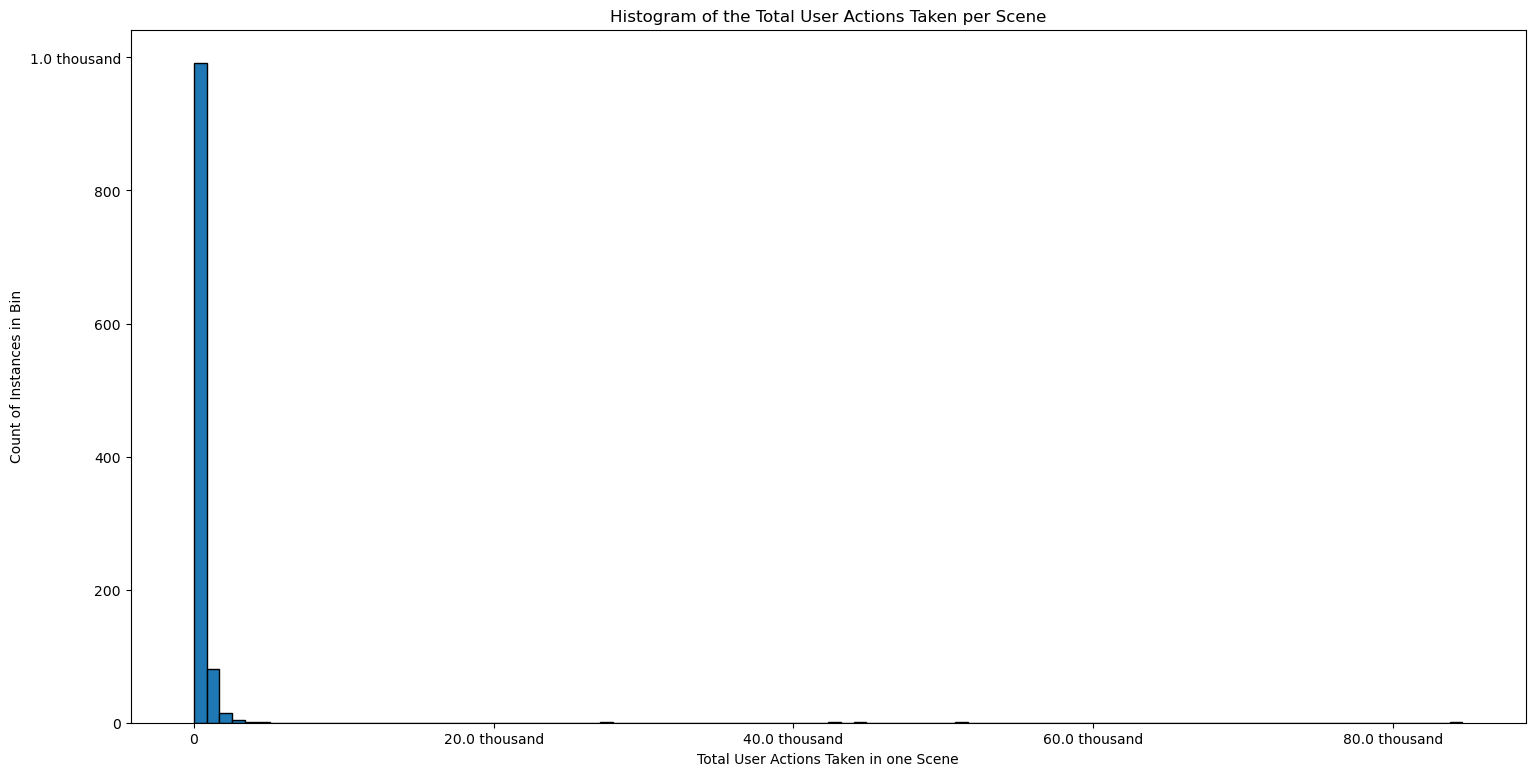

In [9]:

# Display a histogram of the distribution of the number of teleports
xlabel = 'Total User Actions Taken in one Scene'
get_xtick_text = lambda text_obj: humanize.intword(int(text_obj.get_position()[0]))
title = 'Histogram of the Total User Actions Taken per Scene'
nu.plot_histogram(total_actions_df, 'total_actions', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [16]:

# Define a list of action types we're interested in
action_types_list = [
    'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
    'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
    'TOOL_DISCARDED'
]

# Create a boolean mask to filter rows with action types in the list
mask_series = (frvrs_logs_df.action_type.isin(action_types_list))

# Define a list of command messages we're interested in
command_messages_list = [
    'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
    'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
]

# Add to the mask_series to filter rows with specific voice commands
mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & (frvrs_logs_df.voice_command_message.isin(command_messages_list)))

nu.get_minority_combinations(
    frvrs_logs_df[mask_series], ['action_type', 'voice_command_message']
).dropna(axis='columns', how='all').T

,43505,56306,183418,713342
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,193344,111201,159953,504906
event_time,2023-03-14 14:37:39,2023-03-15 12:04:57,2023-07-27 13:16:25,2023-03-07 14:16:00
session_uuid,5de8dcc6-c6ab-43e5-9103-85c8d069cf4b,a7804ee3-6a1c-4462-957a-17976a540483,6d681ea4-2632-4ede-a5d6-6e493c5ebd53,b878d528-37a0-4175-a294-16c4de1fd5eb
file_name,All CSV files renamed by date/03.14.23.1447.csv,All CSV files renamed by date/03.15.23.1220.csv,DCEMS Round 2 only triage sessions/6d681ea4-26...,v.1.0/Clean Marty22.csv
logger_version,1.3,1.3,1.0,1.0
time_group,1,0,1,2
voice_command_message,hold still,where are you,sit up/down,anywhere else
voice_command_command_description,OK can i check his breathing and his pulse OK ...,now i'm following him where are you going,reposition the airway,OK you have any other injuries


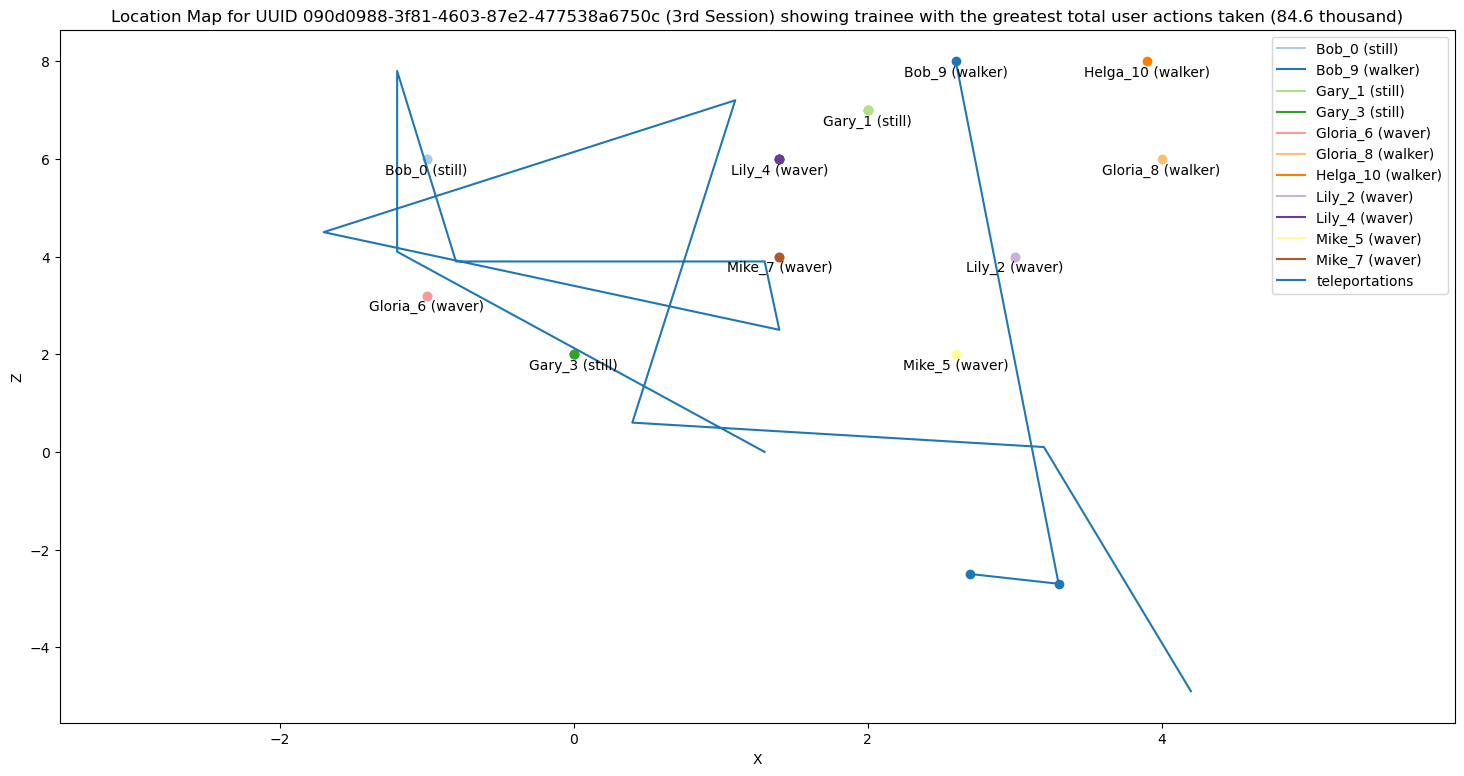

In [17]:

# Get scene with the greatest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

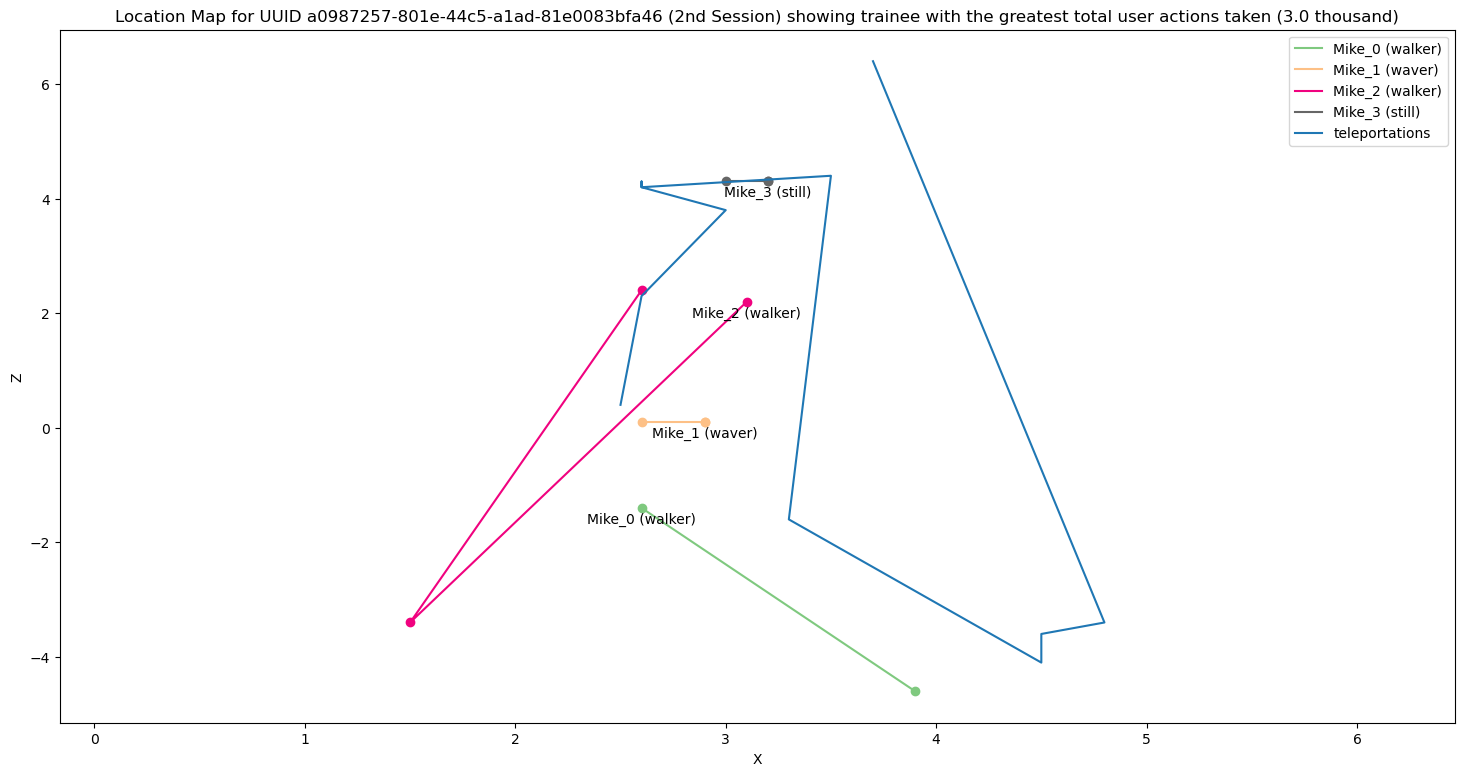

In [18]:

# Get scene with the greatest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False, humanize_type='intword',
    title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

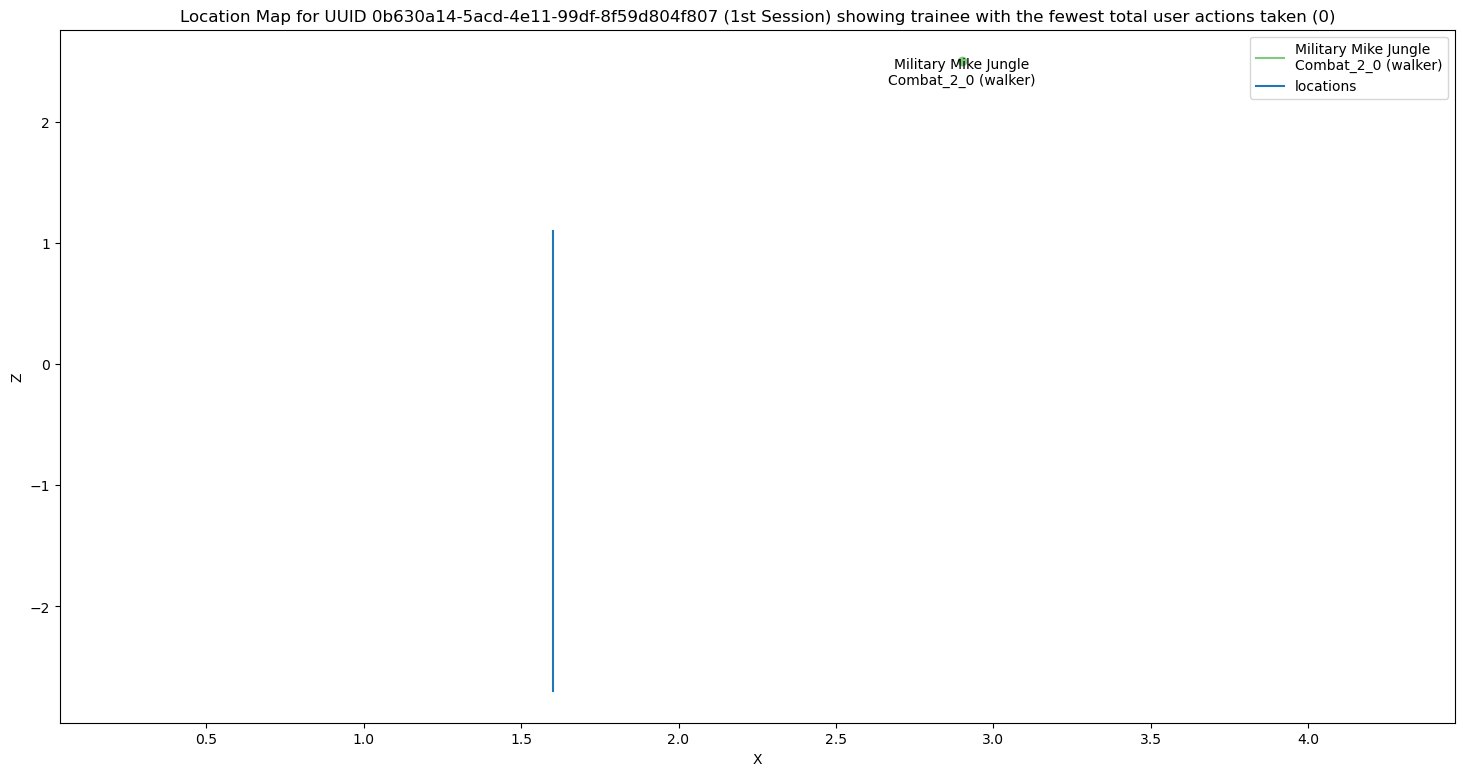

In [9]:

# Get scene with the fewest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

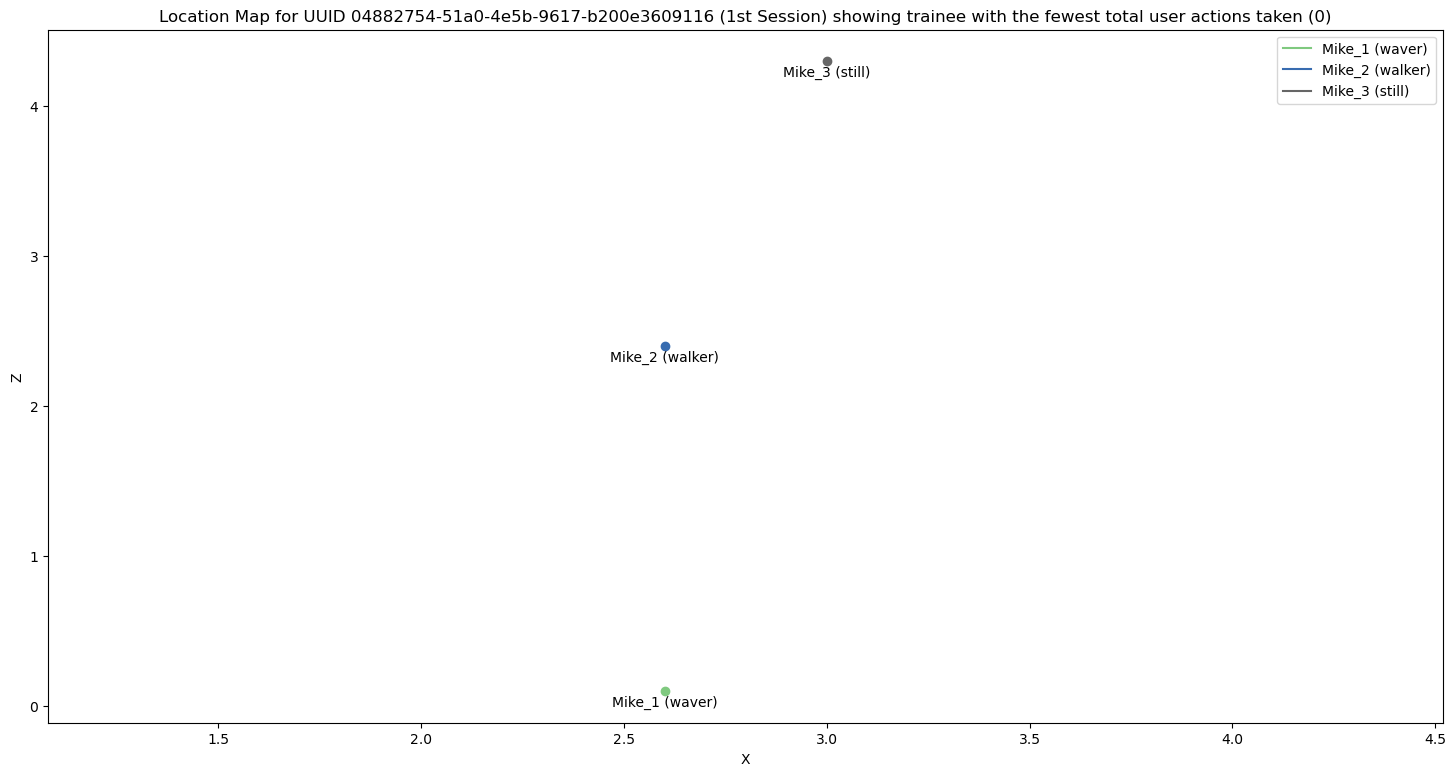

In [10]:

# Get scene with the fewest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)


## What is the average time between user actions?

In [31]:

# Define a list of action types we're interested in
action_types_list = [
    'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
    'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
    'TOOL_DISCARDED'
]

# Create a boolean mask to filter rows with action types in the list
mask_series = (frvrs_logs_df.action_type.isin(action_types_list))

# Define a list of command messages we're interested in
command_messages_list = [
    'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
    'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
]

# Add to the mask_series to filter rows with specific voice commands
mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & (frvrs_logs_df.voice_command_message.isin(command_messages_list)))

groupby_columns = ['session_uuid', 'time_group', 'patient_id']
gb = frvrs_logs_df[mask_series].sort_values(['elapsed_time']).groupby(groupby_columns)
times_between_df = pd.DataFrame([], columns=['elapsed_time', 'logger_version', 'session_uuid', 'time_group', 'patient_id'])
for (session_uuid, time_group, patient_id), df1 in gb:
    
    # Get the difference of each consecutive row in the elapsed time column
    diff_df = df1.elapsed_time.diff().to_frame()

    # Add the scene and patient ID into the new dataframe
    diff_df['logger_version'] = df1.logger_version.unique().item()
    for cn in groupby_columns: diff_df[cn] = eval(cn)

    # Add the interactions count
    diff_df['interactions_count'] = df1.shape[0]
    
    # Add the diff series to the main series
    times_between_df = pd.concat([times_between_df, diff_df], axis='index')

In [20]:

ave_time = humanize.precisedelta(timedelta(milliseconds=times_between_df.elapsed_time.mean()))
print(f'The average time between user actions is {ave_time}.')

The average time between user actions is 3.61 seconds.


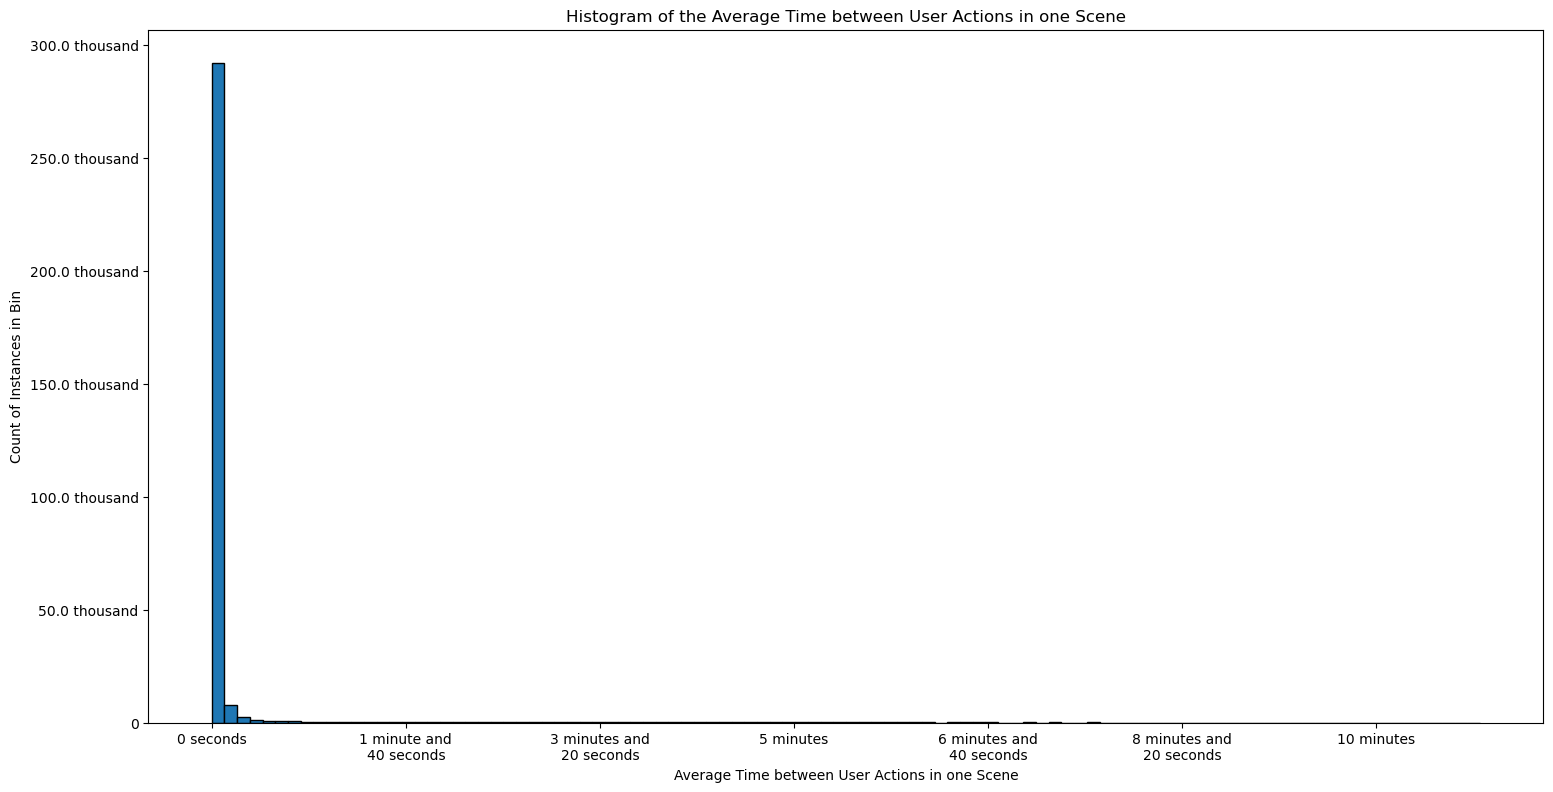

In [35]:

# Display a histogram of the average time between user actions
mask_series = times_between_df.elapsed_time.isnull()
df = times_between_df[~mask_series]
xlabel = 'Average Time between User Actions in one Scene'
get_xtick_text = lambda text_obj: humanize.precisedelta(
    timedelta(milliseconds=text_obj.get_position()[0])
).replace(', ', ',\n').replace(' and ', ' and\n')
title = f'Histogram of the {xlabel}'
nu.plot_histogram(df, 'elapsed_time', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [41]:

def show_long_runs(df, column_name, milliseconds, delta_fn, description):
    delta = delta_fn(milliseconds)
    print(f'\nThese files have {description} than {delta}:')
    mask_series = (df[column_name] > milliseconds)
    session_uuid_list = df[mask_series].session_uuid.tolist()
    mask_series = frvrs_logs_df.session_uuid.isin(session_uuid_list)
    logs_folder = '../data/logs'
    import csv
    from datetime import datetime
    for old_file_name in frvrs_logs_df[mask_series].file_name.unique():
        old_file_path = os.path.join(logs_folder, old_file_name)
        with open(old_file_path, 'r') as f:
            reader = csv.reader(f, delimiter=',', quotechar='"')
            for values_list in reader:
                date_str = values_list[2]
                break
            try: date_obj = datetime.strptime(date_str, '%m/%d/%Y %H:%M')
            except ValueError: date_obj = datetime.strptime(date_str, '%m/%d/%Y %I:%M:%S %p')
            new_file_name = date_obj.strftime('%y.%m.%d.%H%M.csv')
            new_sub_directory = old_file_name.split('/')[0]
            new_file_path = new_sub_directory + '/' + new_file_name
            print(f'{old_file_name} (or {new_file_path})')

In [42]:

# 1 second = 1000 milliseconds; 1 minute = 60 seconds
ten_minutes = 1_000 * 60 * 10
delta_fn = lambda x: humanize.precisedelta(timedelta(milliseconds=x))
description = 'mean times between user actions longer'
show_long_runs(df, 'elapsed_time', ten_minutes, delta_fn, description)


These files have mean times between user actions longer than 10 minutes:
DCEMS Round 2 only triage sessions/ab1f8cd1-8d65-45da-b087-89b25ff46c66.csv (or DCEMS Round 2 only triage sessions/23.08.03.0755.csv)
Disaster Day 2022/BC_1136.csv (or Disaster Day 2022/22.03.15.1119.csv)
v.1.0/Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv (or v.1.0/23.05.16.1615.csv)



## What is the average interactions per patient?

In [32]:

ave_count = humanize.intword(times_between_df.interactions_count.mean())
print(f'The average interactions per patient is {ave_count}.')

The average interactions per patient is 24.6 thousand.


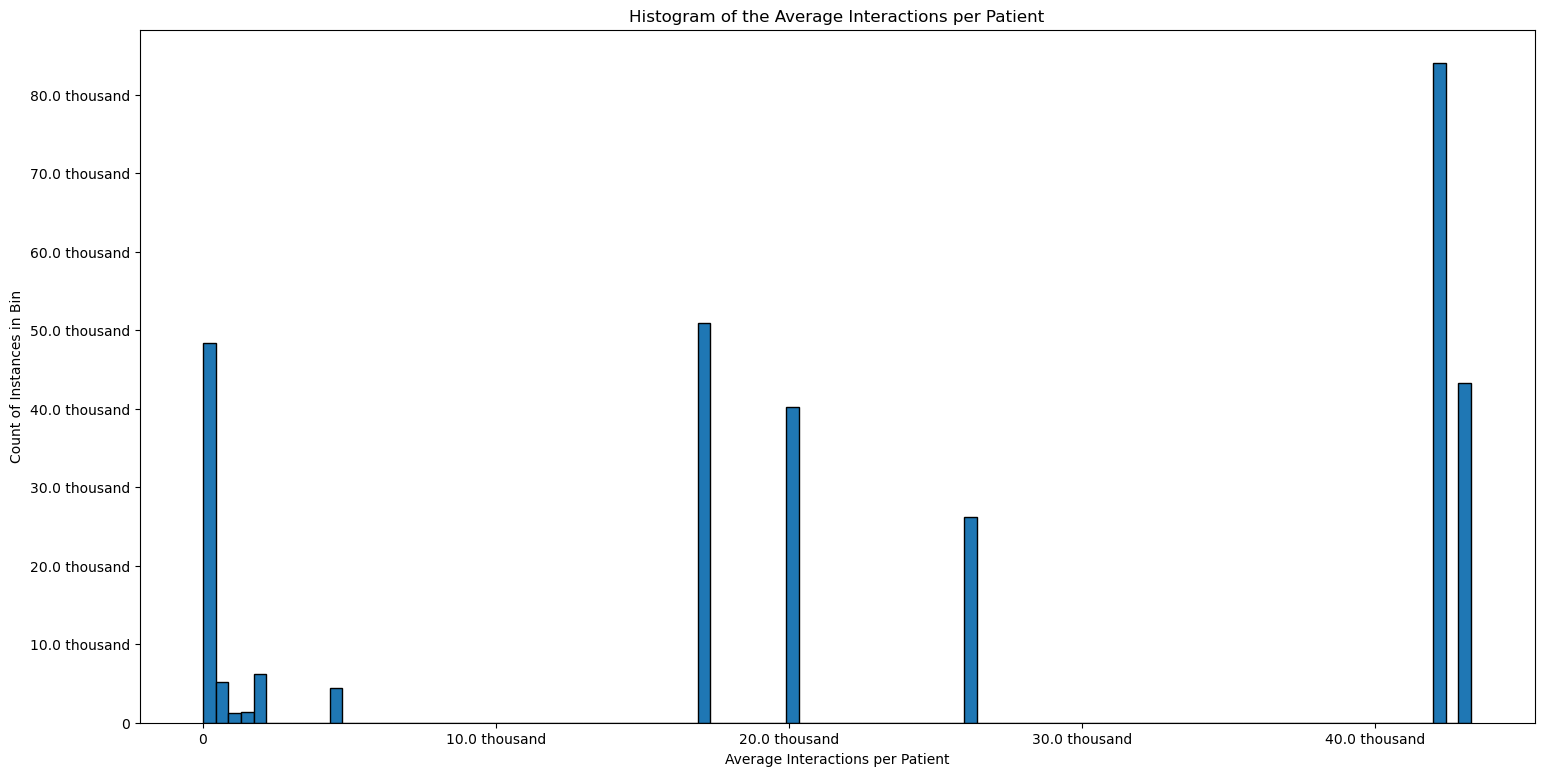

In [36]:

# Display a histogram of the average interactions per patient
mask_series = times_between_df.elapsed_time.isnull()
df = times_between_df[~mask_series]
xlabel = 'Average Interactions per Patient'
get_xtick_text = lambda text_obj: humanize.intword(int(text_obj.get_position()[0]))
title = f'Histogram of the {xlabel}'
nu.plot_histogram(df, 'interactions_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [43]:

delta_fn = lambda x: humanize.intword(int(x))
description = 'average interactions per patient greater'
show_long_runs(df, 'interactions_count', 1_000, delta_fn, description)


These files have average interactions per patient greater than 1.0 thousand:
All CSV files renamed by date/03.10.23.0925.csv (or All CSV files renamed by date/23.03.10.0925.csv)
All CSV files renamed by date/04.20.23.1147.csv (or All CSV files renamed by date/23.04.20.1134.csv)
All CSV files renamed by date/04.25.23.1013.csv (or All CSV files renamed by date/23.04.25.1013.csv)
DCEMS Round 2 only triage sessions/Kali S..csv (or DCEMS Round 2 only triage sessions/23.07.26.1220.csv)
Disaster Day 2022/JS_1016.csv (or Disaster Day 2022/22.03.15.1008.csv)
Disaster Day 2022/MH_1135.csv (or Disaster Day 2022/22.03.16.1124.csv)
Disaster Day 2022/MT_0950.csv (or Disaster Day 2022/22.03.15.0929.csv)
Disaster Day 2022/RM_1031.csv (or Disaster Day 2022/22.03.16.1027.csv)
Disaster Day 2022/TS_0900.csv (or Disaster Day 2022/22.03.15.0848.csv)
Disaster Day 2022/TW_1019.csv (or Disaster Day 2022/22.03.15.1008.csv)
